## Module 6: Multi-Class Classification

So far we have been generating binary data; that is, with two classes only. In this module, however, we will generate a multiclass data, at least with three classes, and, then, classify it.

1. Generate a multiclass data with at least 3 classes.
2. Build a simple model and train the network for classification
3. Build a deep neural network model with following features:
  1. Five layers
  2. First layer has 128 neurons
  3. Second layer has 64 neurons
  4. Third layer has 32 neurons
  5. Fourth layer has 16 neurons
  3. Last layer has one neuron
  4. All neurons have tanh activation function except the last layer's neuron.
3. Train that model
4. Check the performance of our model on non-linear data

***

## Imports

Let's import the required packages and libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import confusion_matrix, classification_report

## Creating a MultiClass Dataset

In this module, we will build a multiclass dataset with three classes - you can try more class datasets -- using `make_multiclass(K=3)` function of `sklearn.datasets` library.

In [2]:
np.random.seed(0)
no_of_features  = 2
no_of_classes = 3
no_of_samples = 1000
X = np.zeros((no_of_samples*no_of_classes, no_of_features))
y = np.zeros(no_of_samples*no_of_classes)
for j in range(no_of_classes):
  ix = range(no_of_samples*j, no_of_samples*(j+1))
  r = np.linspace(0.0,1,no_of_samples)
  t = np.linspace(j*4,(j+1)*4,no_of_samples) + np.random.randn(no_of_samples)*0.2
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

---
### View the dataset
To view the data, let's use 'dataFrame` method of **pandas** libraray to view the data.
---

In [3]:
import pandas as pd
import numpy as np
data = {'feature-1': list(X[:,0]),
        'feature-2': list(X[:,1]),
        'target': list(y[:,])}

data = pd.DataFrame(data)
data

,feature-1,feature-2,target
0,0.000000,0.000000,0.0
1,0.000084,0.000997,0.0
2,0.000405,0.001961,0.0
3,0.001334,0.002691,0.0
4,0.001521,0.003704,0.0
...,...,...,...
2995,-0.165119,0.982214,2.0
2996,-0.686763,0.722745,2.0
2997,-0.574057,0.816369,2.0
2998,-0.725541,0.686723,2.0


---
Let's visualize the data using the `plot` function of the `matplotlib.pyplot`.
---

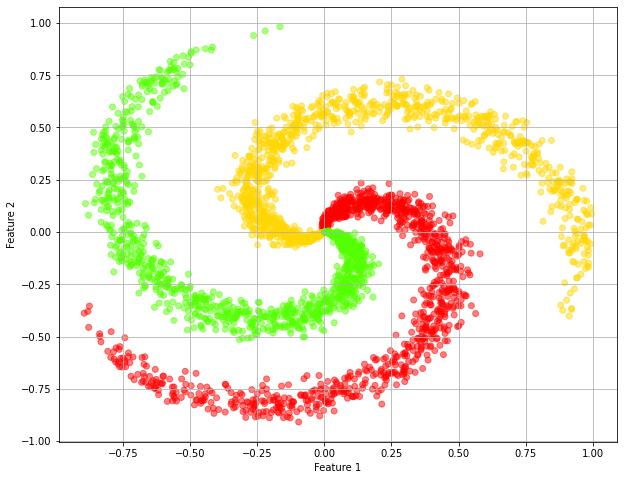

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1],  c = y, alpha = 0.5, cmap = 'prism', marker = 'o');
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid('on')

*** 
**A Few Details About Multiclass Classification Cases**

There a number of things we should keep in mind while designing and training a model for multi-class classification problem.

1. The number of nuerons in the output layer should be equal to the number of classes. For instance, in the given example, there are three classes; therefore, there will be three nodes in the output layer.

2. We use **SoftMax** activation function instead of **Sigmoid** activation function. We use the sigmoid activation function for binary classification and softmax for multiclass classification problems.

 The [softmax](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer) activation function is defined below.
\begin{equation}
\sigma\left(\overrightarrow{z}\right)_i = \frac{e^{z_i}}{\sum_{j = 1}^{k}e^{z_j}}
\end{equation}
  where

  1.  $\overrightarrow{z}$
   is the input vector to the softmax function, made up of $(z_0, \dots z_K)$
  2. $z_i$ represents the elements of the input vector to the softmax function.
  3. k denotes the number of classes. 

 
3. The outputs $y$ are not hot-encoded; that is, they are not in the form of [0, 0, 0] for class 0, [0, 1, 0] for class 1, and [1, 0, 0] for class 2. Therefore, we will use 'Sparse_Categorical_CrossEntropy` loss function. If it was hot-encoded, we would have used 'Categorical_CrossEntropy` instead of `Sparse_Categorical_CrossEntropy`.
***

___
## Defining a simple model

Let's define a simple model, which consists of a single layer with single neuron. Further details are in the below code.

In [5]:
simple_model = Sequential(name = 'Simple-Model') 
simple_model.add(Dense(units = 3, activation='softmax', input_shape = (2, ), name = 'Layer_1'))
print(simple_model.summary())
simple_model.compile(optimizer=Adam(learning_rate=0.01),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=['accuracy'])

# Let's train for 100 epochs
y_cat = tf.keras.utils.to_categorical(y)
history = simple_model.fit(x=X, y=y, verbose=0, epochs=100)

Model: "Simple-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


***
Let's print the loss and accuracy plot
___

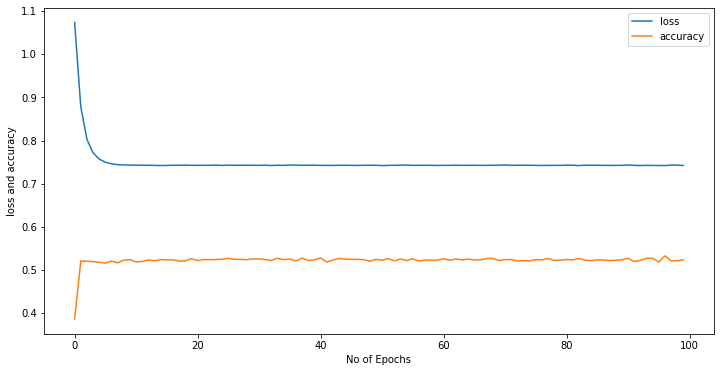

In [6]:
plt.figure(figsize = (12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.xlabel('No of Epochs')
plt.ylabel('loss and accuracy')
plt.show()

***
## Performance of Our Model

In the following code, we have written a function required to draw the decision boundary.

In [7]:
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    
    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

### Plot the Decision Boundary

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


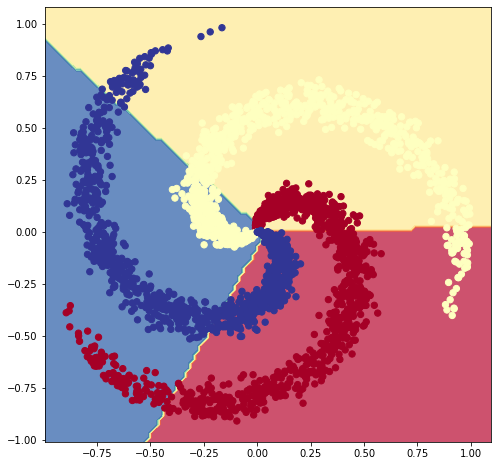

In [8]:
plot_multiclass_decision_boundary(simple_model, X, y)

It is visible that our model is not successful in seperating the two classes, but its performance is better than the previous simple model.

### Plotting the Confusion Matrix

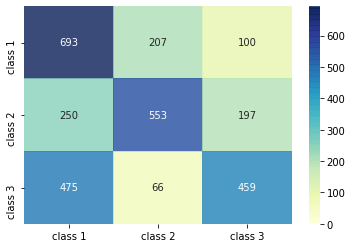

In [9]:
import seaborn as sns
x_axis_labels = ['class 1', 'class 2', 'class 3'] # labels for x-axis
y_axis_labels = ['class 1', 'class 2', 'class 3'] # labels for y-axis 
y_pred = simple_model.predict(X, verbose=0)
y_pred = np.where(y_pred > 0.5, 1,0)
y_pred_sparse = np.argmax(y_pred, axis = 1) # converting from hot-encoded to sparse representation
sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred_sparse)),
            annot=True, fmt='d', cmap='YlGnBu', 
            alpha=0.8, vmin=0, xticklabels=x_axis_labels, yticklabels=y_axis_labels);


***
### Measing Models Performance

When you build a model for a classification problem you almost always want to look at the accuracy of that model as the number of correct predictions from all predictions made. This is the **classification accuracy**.

Once you have a model that you believe can make robust predictions you need to decide whether it is a good enough model to solve your problem. Classification accuracy alone is typically not enough information to make this decision.

#### [Precision](https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/)
The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly). The precision measures the model's accuracy in classifying a sample as positive.

\begin{equation}
Precision = \frac{True \ Positive}{True \ Positive + False \ Positive}
\end{equation} 

#### [Recall](https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/)

The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

\begin{equation}
Precision = \frac{True \ Positive}{True \ Positive + False \ Negative}
\end{equation} 

The recall cares only about how the positive samples are classified. This is independent of how the negative samples are classified, e.g. for the precision. When the model classifies all the positive samples as Positive, then the recall will be $100\%$ even if all the negative samples were incorrectly classified as Positive. 

#### [F1 Score](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/#:~:text=The%20F1%20Score%20is%20the,0%2B0%20or%200.)



The F1 Score score conveys the balance between the precision and the recall, and it is measured as follows:

\begin{equation}
F1 \ Score = 2*\frac{Precision \times Recall}{Precision + Recall}
\end{equation}



***

In [10]:
y_pred = simple_model.predict(X, verbose=0)
y_pred = np.where(y_pred > 0.5, 1,0)
y_pred_sparse = np.argmax(y_pred, axis = 1) # converting from hot-encoded to sparse representation
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y, y_pred_sparse, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.49      0.69      0.57      1000
     class 2       0.67      0.55      0.61      1000
     class 3       0.61      0.46      0.52      1000

    accuracy                           0.57      3000
   macro avg       0.59      0.57      0.57      3000
weighted avg       0.59      0.57      0.57      3000



***
***

## Deep Neural Network

Now let's build a deep ANN for multiclass classificatio by adding more Dense layers with tanh activation function, and decreasing number of nodes per layer.



In [11]:
deep_model = Sequential(name = 'Deep-Model')

deep_model.add(Dense(units = 128, input_shape = (2, ), activation = 'tanh', name = 'Layer-1'))
deep_model.add(Dense(units = 64, activation = 'tanh', name = 'Layer2'))
deep_model.add(Dense(units = 32, activation = 'tanh', name = 'Layer3'))
deep_model.add(Dense(units = 16, activation = 'tanh', name = 'Layer4'))
deep_model.add(Dense(units = 3, activation = 'softmax', name = 'Layer5'))

deep_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

history = deep_model.fit(X, y, verbose = False, epochs = 100)
print(deep_model.summary())

Model: "Deep-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer-1 (Dense)              (None, 128)               384       
_________________________________________________________________
Layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
Layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
Layer4 (Dense)               (None, 16)                528       
_________________________________________________________________
Layer5 (Dense)               (None, 3)                 51        
Total params: 11,299
Trainable params: 11,299
Non-trainable params: 0
_________________________________________________________________
None


***
Let's print the loss and accuracy plot
___

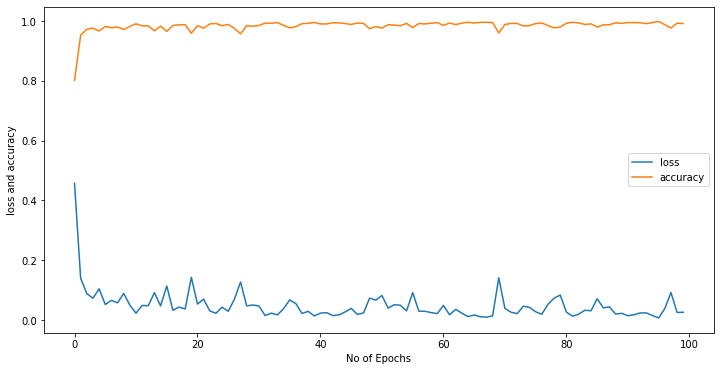

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.xlabel('No of Epochs')
plt.ylabel('loss and accuracy')
plt.show()

***
## Performance of Our Model

### Plot the Decision Boundary

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


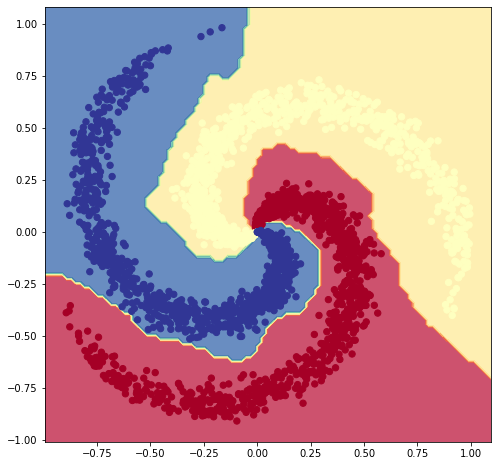

In [13]:
plot_multiclass_decision_boundary(deep_model, X, y)

### Plotting the Confusion Matrix

              precision    recall  f1-score   support

     class 1       1.00      0.98      0.99      1000
     class 2       1.00      1.00      1.00      1000
     class 3       0.98      1.00      0.99      1000

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



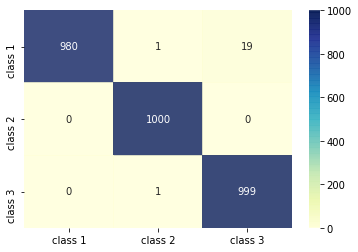

In [14]:
import seaborn as sns
x_axis_labels = ['class 1', 'class 2', 'class 3'] # labels for x-axis
y_axis_labels = ['class 1', 'class 2', 'class 3'] # labels for y-axis 
y_pred = deep_model.predict(X, verbose=0)
y_pred_sparse = np.argmax(y_pred, axis = 1) # converting from hot-encoded to sparse representation
sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred_sparse)),
            annot=True, fmt='d', cmap='YlGnBu', 
            alpha=0.8, vmin=0, xticklabels=x_axis_labels, yticklabels=y_axis_labels);

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y, y_pred_sparse, target_names=target_names))